In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../BBTRE_physics_analysis/") 

In [3]:
import numpy as np
import xarray as xr

from xmitgcm import open_mdsdataset 
from xhistogram.xarray import histogram

from osse import *
from canyon_utils import *
from sloped_MITgcm import *

### Configuration parameters

In [4]:
# Constant parameters

Γ = 0.0008613659531090722
N = np.sqrt(g*α*Γ)
θ = 1.26E-3
f = -5.3e-5

h = 230
k0 = 5.2e-5
k1 = 1.8e-3

dx = 600.; dy = 600.
delta_t = 15.

### Load moment calculations

In [5]:
ds = xr.open_dataset("../../data/BBTRE-tracer/tracer_moments.nc")
ds_t = xr.open_dataset("../../data/BBTRE-tracer/time-approx_tracer_moments.nc")

In [6]:
ds

<xarray.Dataset>
Dimensions:                   (time: 499)
Coordinates:
    iter                      (time) int64 ...
  * time                      (time) timedelta64[ns] 1251 days ... 1749 days
    days                      (time) float64 ...
Data variables:
    M_Tr01                    (time) float64 ...
    Xbar_Tr01                 (time) float64 ...
    Zbar_Tr01                 (time) float64 ...
    Zrbar_Tr01                (time) float64 ...
    HABbar_Tr01               (time) float64 ...
    θbar_Tr01                 (time) float64 ...
    M_Tr02                    (time) float64 ...
    Xbar_Tr02                 (time) float64 ...
    Zbar_Tr02                 (time) float64 ...
    Zrbar_Tr02                (time) float64 ...
    HABbar_Tr02               (time) float64 ...
    θbar_Tr02                 (time) float64 ...
    M_Tr03                    (time) float64 ...
    Xbar_Tr03                 (time) float64 ...
    Zbar_Tr03                 (time) float64 ...
    Zrbar_Tr03                (time) float64 ...
    HABbar_Tr03               (time) float64 ...
    θbar_Tr03                 (time) float64 ...
    d(θbar)dt_Tr01            (time) float64 ...
    d(θbar)dt_ADV_Tr01        (time) float64 ...
    d(θbar)dt_DIFF_Tr01       (time) float64 ...
    d(θbar)dt_RHS_Tr01        (time) float64 ...
    ωbar_Tr01                 (time) float64 ...
    2ω_Tr01                   (time) float64 ...
    d(θbar)dt_Tr02            (time) float64 ...
    d(θbar)dt_ADV_Tr02        (time) float64 ...
    d(θbar)dt_DIFF_Tr02       (time) float64 ...
    d(θbar)dt_RHS_Tr02        (time) float64 ...
    ωbar_Tr02                 (time) float64 ...
    2ω_Tr02                   (time) float64 ...
    d(θbar)dt_Tr03            (time) float64 ...
    d(θbar)dt_ADV_Tr03        (time) float64 ...
    d(θbar)dt_DIFF_Tr03       (time) float64 ...
    d(θbar)dt_RHS_Tr03        (time) float64 ...
    ωbar_Tr03                 (time) float64 ...
    2ω_Tr03                   (time) float64 ...
    d(θbar**2)dt_Tr01         (time) float64 ...
    d(θ**2bar)dt_Tr01         (time) float64 ...
    d((θ-θbar)**2)bardt_Tr01  (time) float64 ...
    Gradθ**2bar_Tr01          (time) float64 ...
    κbar_Tr01                 (time) float64 ...
    κGradθ**2bar_Tr01         (time) float64 ...
    κTaylor_Tr01              (time) float64 ...
    ωbarθbar_Tr01             (time) float64 ...
    _(ωθ)bar_Tr01             (time) float64 ...
    _(ωpθp)bar_Tr01           (time) float64 ...
    κOmega_Tr01               (time) float64 ...
    κTracer_Tr01              (time) float64 ...
    d(θbar**2)dt_Tr02         (time) float64 ...
    d(θ**2bar)dt_Tr02         (time) float64 ...
    d((θ-θbar)**2)bardt_Tr02  (time) float64 ...
    Gradθ**2bar_Tr02          (time) float64 ...
    κbar_Tr02                 (time) float64 ...
    κGradθ**2bar_Tr02         (time) float64 ...
    κTaylor_Tr02              (time) float64 ...
    ωbarθbar_Tr02             (time) float64 ...
    _(ωθ)bar_Tr02             (time) float64 ...
    _(ωpθp)bar_Tr02           (time) float64 ...
    κOmega_Tr02               (time) float64 ...
    κTracer_Tr02              (time) float64 ...
    d(θbar**2)dt_Tr03         (time) float64 ...
    d(θ**2bar)dt_Tr03         (time) float64 ...
    d((θ-θbar)**2)bardt_Tr03  (time) float64 ...
    Gradθ**2bar_Tr03          (time) float64 ...
    κbar_Tr03                 (time) float64 ...
    κGradθ**2bar_Tr03         (time) float64 ...
    κTaylor_Tr03              (time) float64 ...
    ωbarθbar_Tr03             (time) float64 ...
    _(ωθ)bar_Tr03             (time) float64 ...
    _(ωpθp)bar_Tr03           (time) float64 ...
    κOmega_Tr03               (time) float64 ...
    κTracer_Tr03              (time) float64 ...

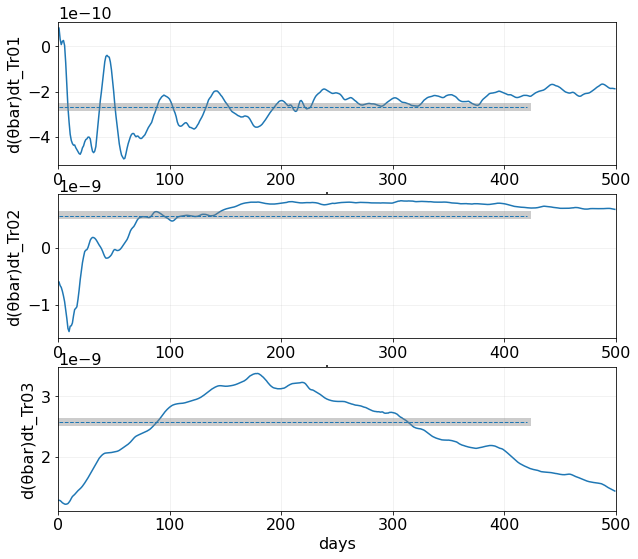

In [7]:
plt.figure(figsize=(10,9))
for tr in [1, 2, 3]:
    plt.subplot(3,1,tr)
    (0.5*ds[f"d(θbar)dt_Tr0{tr}"]).plot(x='days')
    plt.plot([1, 420], np.array([1., 1.])*0.5*ds_t[f"d(θbar)dt_LHS-approx_Tr0{tr}"].values, color="grey", ls="-", lw=8, alpha=0.4)
    plt.plot([1, 420], np.array([1., 1.])*(0.5*ds[f"d(θbar)dt_Tr0{tr}"]).isel(time=slice(0, 420)).mean('time').values, color="C0", ls="--", lw=1)
    plt.xlim(0, 500)
    plt.grid(True, alpha=0.2)

<ipython-input-8-debc8a977aab>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,2,(tr-1)*2+1)
<ipython-input-8-debc8a977aab>:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,2,tr*2)
<ipython-input-8-debc8a977aab>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be creat

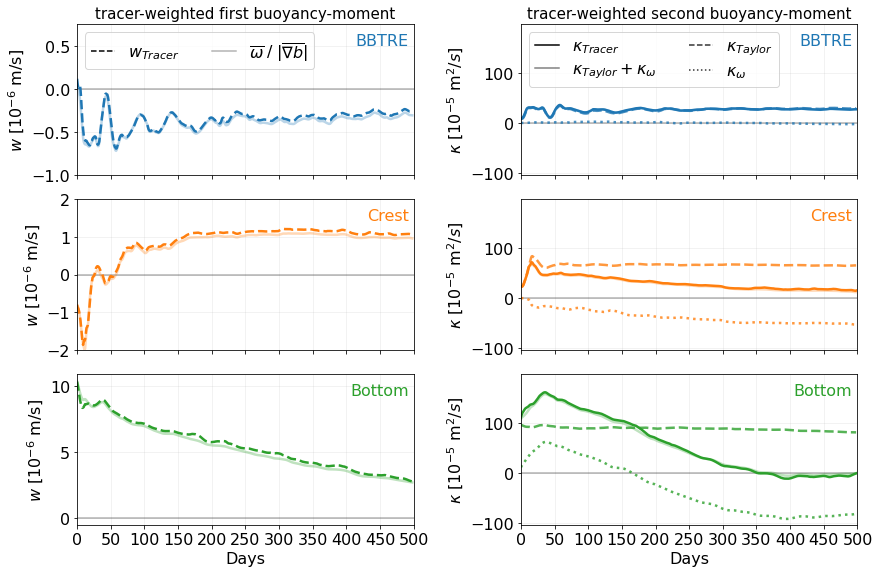

In [8]:
plt.figure(figsize=(12.5,8))

plt.grid(True)
tr_names = {1: "BBTRE", 2: "Crest", 3: "Bottom"}
tr_cols = {1: "C0", 2: "C1", 3: "C2"}

plt.subplot(3,2,1)
plt.plot([],[],"k--", label=r"$w_{Tracer}$")
plt.plot([],[],"k-", alpha=0.3, label=r"$\overline{\omega}\; / \;\left| \overline{\nabla b} \right|$")
plt.legend(loc="upper left", ncol=2, labelspacing=0.4, handlelength=1.5)

for tr in [1,2,3]:
    plt.subplot(3,2,(tr-1)*2+1)
    plt.grid(True, alpha=0.2)
    plt.axhline(0., color="k", alpha=0.3, lw=1.5)
    plt.plot(ds[f"ωbar_Tr0{tr}"]/ds[f"Gradθ**2bar_Tr0{tr}"]**0.5*1e6, lw=2.5, c=tr_cols[tr], ls="-", alpha=0.3)
    plt.plot(0.5*ds[f"d(θbar)dt_Tr0{tr}"]/ds[f"Gradθ**2bar_Tr0{tr}"]**0.5*1e6, lw=2.5, c=tr_cols[tr], ls="--")
    plt.xlim(0, 500)
    plt.ylabel(r"$w$ [10$^{-6}$ m/s]")
    plt.annotate(tr_names[tr], xy=(0.985, 0.86), xycoords="axes fraction", color=tr_cols[tr], horizontalalignment="right")
    if tr in [1,2]:
        plt.xticks(np.arange(0, 550, 50), [])
    else:
        plt.xticks(np.arange(0, 550, 50))

plt.xlabel("Days")


plt.subplot(3,2,2)
plt.plot([],[],"k-", label=r"$\kappa_{Tracer}$")
plt.plot([],[],"k-", alpha=0.5, label=r"$κ_{Taylor} + κ_{ω}$")
plt.plot([],[],"k--", alpha=0.8, label=r"$κ_{Taylor}$")
plt.plot([],[],"k:", alpha=0.8, label=r"$κ_{ω}$")
plt.legend(loc="upper left", ncol=2, labelspacing=0.4, handlelength=1.5)

for tr in [1,2,3]:
    plt.subplot(3,2,tr*2)
    plt.grid(True, alpha=0.2)
    plt.axhline(0., color="k", alpha=0.3, lw=1.5)
    plt.plot(1e5*(ds[f"κTaylor_Tr0{tr}"]+ds[f"κOmega_Tr0{tr}"]), lw=2.5, c=tr_cols[tr], ls="-", alpha=0.3)
    plt.plot(1e5*ds[f"κTracer_Tr0{tr}"], lw=2.5, c=tr_cols[tr], ls="-")
    plt.plot(1e5*ds[f"κTaylor_Tr0{tr}"], lw=2.5, c=tr_cols[tr], ls="--", alpha=0.8)
    plt.plot(1e5*ds[f"κOmega_Tr0{tr}"], lw=2.5, c=tr_cols[tr], ls=":", alpha=0.8)
    plt.xlim(0, 500)
    plt.ylim(2e5*-10*k0, 1e5*1.1*k1)
    plt.ylabel(r"$κ$ [10$^{-5}$ m$^{2}/s$]")
    plt.annotate(tr_names[tr], xy=(0.985, 0.86), xycoords="axes fraction", color=tr_cols[tr], horizontalalignment="right")
    if tr in [1,2]:
        plt.xticks(np.arange(0, 550, 50), [])
    else:
        plt.xticks(np.arange(0, 550, 50))
        
plt.xlabel("Days")
plt.tight_layout()

plt.subplot(3,2,1)
plt.title("tracer-weighted first buoyancy-moment", fontsize=15)
plt.ylim(-1, 0.75)
plt.subplot(3,2,3)
plt.ylim(-2, 2)
plt.subplot(3,2,2)
plt.title("tracer-weighted second buoyancy-moment", fontsize=15)

plt.savefig("../../figures/BBTRE-tracer/tracer_moments.png", bbox_inches="tight", dpi=200.)

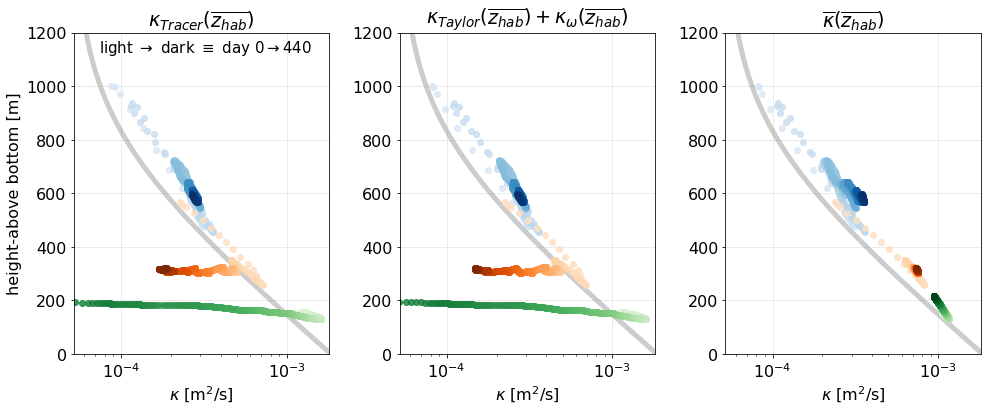

In [9]:
zplot = np.arange(0, 1500., 1.)

cmaps = [
    None,
    matplotlib.cm.get_cmap("Blues"),
    matplotlib.cm.get_cmap("Oranges"),
    matplotlib.cm.get_cmap("Greens")
]

nt = 440

plt.figure(figsize=(14,6))
plt.subplot(1,3,1)
plt.grid(True, alpha=0.3)
plt.semilogx(k0+k1*np.exp(-zplot/h), zplot, lw=5, c="grey", alpha=0.4)
plt.title(r"$κ_{Tracer}(\overline{z_{hab}})$")
for tr in [1,2,3]:
    for t in range(0, nt):
        plt.semilogx(
            ds[f"κTracer_Tr0{tr}"][t],
            ds[f'HABbar_Tr0{tr}'][t],
            color=cmaps[tr](0.15+0.85*ds['days'][t].values/nt),
            marker="o",
            alpha=0.8
        )
plt.xlim(k0, k1)
plt.ylim(0, 1200)
plt.xlabel(r"$κ$ [m$^{2}$/s]")
plt.ylabel("height-above bottom [m]")
plt.annotate(r"light $\rightarrow$ dark $\equiv$ day $0 \rightarrow 440$", xy=(0.1, 0.94), xycoords="axes fraction", fontsize=15)

plt.subplot(1,3,2)
plt.grid(True, alpha=0.3)
plt.semilogx(k0+k1*np.exp(-zplot/h), zplot, lw=5, c="grey", alpha=0.4)
plt.title(r"$κ_{Taylor}(\overline{z_{hab}}) + κ_{\omega}(\overline{z_{hab}})$")
for tr in [1,2,3]:
    for t in range(0, nt):
        plt.semilogx(
            ds[f'κTaylor_Tr0{tr}'][t] + ds[f'κOmega_Tr0{tr}'][t],
            ds[f'HABbar_Tr0{tr}'][t],
            color=cmaps[tr](0.15+0.85*ds['days'][t].values/nt),
            marker="o",
            alpha=0.8
        )
plt.xlim(k0, k1)
plt.ylim(0, 1200)
plt.xlabel(r"$κ$ [m$^{2}$/s]")

plt.subplot(1,3,3)
plt.grid(True, alpha=0.3)
plt.semilogx(k0+k1*np.exp(-zplot/h), zplot, lw=5, c="grey", alpha=0.4)
plt.title(
    r"$\overline{κ}(\overline{z_{hab}})$"
)
for tr in [1,2,3]:
    for t in range(0, nt):
        plt.semilogx(
            ds[f'κbar_Tr0{tr}'][t],
            ds[f'HABbar_Tr0{tr}'][t],
            color=cmaps[tr](0.15+0.85*ds['days'][t].values/nt),
            marker="o",
            alpha=0.8
        )
plt.xlim(k0, k1)
plt.ylim(0, 1200)
plt.xlabel(r"$κ$ [m$^{2}$/s]")

plt.tight_layout()
plt.savefig("../../figures/BBTRE-tracer/tracer_diffusivities_hab.png", bbox_inches="tight", dpi=200.)

(-1e-05, 3e-05)

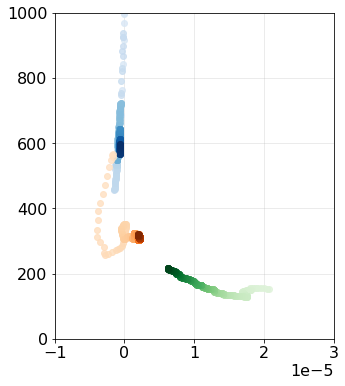

In [13]:
plt.figure(figsize=(5, 6))
plt.grid(True, alpha=0.3)
#plt.plot(w, z, lw=5., color="grey", alpha=0.4)
for tr in [1,2,3]:
    for t in range(0, nt):
        plt.plot(
            ds[f'2ω_Tr0{tr}'][t]/(ds[f'Gradθ**2bar_Tr0{tr}'][t]**0.5),
            ds[f'HABbar_Tr0{tr}'][t],
            color=cmaps[tr](0.15+0.85*ds['days'][t].values/nt),
            marker="o",
            alpha=0.8
        )
plt.ylim(0, 1000)
plt.xlim(-1e-5, 3e-5)

In [79]:
data_dir = f"../../MITgcm/experiments/rotated_BBTRE_canyon-tracer/run/"
flow = open_mdsdataset(data_dir,ignore_unknown_vars=True,prefix=["standardDiag"], delta_t=delta_t)
mix = open_mdsdataset(data_dir,iters=[7200000],ignore_unknown_vars=True,prefix=["budgetDiag"], delta_t=delta_t)
print(f"Δt = {(flow['time'][-1] - flow['time'][0]).values*1e-9/(24*60*60)} days")
flow = flow.mean('time')
flow, flow_grid = add_rotated_coords(flow, θ)
mix, mix_grid = add_rotated_coords(mix, θ)

Δt = 450 days


In [34]:
flow = add_hab_coordinates(flow, flow_grid, vert_coord='Z', gridface='W')
flow['UVEL_hab'] = hab_interp(flow['UVEL'], vert_coord='Z', gridface='W')

In [95]:
flow["Nsq"] = -g/ρ0*flow["DRHODR"]+N**2
flow = add_hab_coordinates(flow, flow_grid, vert_coord='Zl', gridface='C')
flow['Nsq_habmean'] = hab_interp(flow['Nsq'], vert_coord='Zl', gridface='C').mean(["XC", "YC"]).compute()
flow['Nsq_habmean'][0] = 0.
mix = add_hab_coordinates(mix, mix_grid, vert_coord='Zl', gridface='C')
flow['κ_habmean'] = hab_interp(mix['KVDIFF'].isel(time=-1), vert_coord='Zl', gridface='C').mean(["XC", "YC"]).compute()

In [154]:
Nsq = flow['Nsq_habmean'].values
κNsq = (flow['κ_habmean']*flow['Nsq_habmean']).values
dκNsqdz = np.diff(κNsq)/5.
w = dκNsqdz/(0.5*(Nsq[1:]+Nsq[:-1]))
w[0]=0.
z = 0.5*(flow["habC"][1:].values+flow["habC"][:-1].values)

In [35]:
flow["UVEL_habmean"] = flow['UVEL_hab'].mean(['XG', 'YC'], skipna=True).compute()

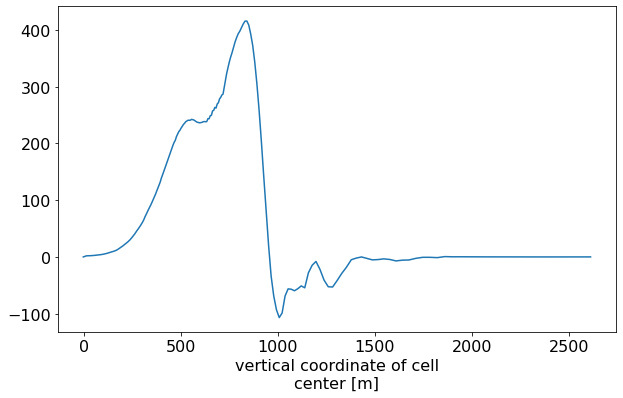

In [59]:
(flow['UVEL']*flow["drF"]).sum(['XG', "YC"]).plot()

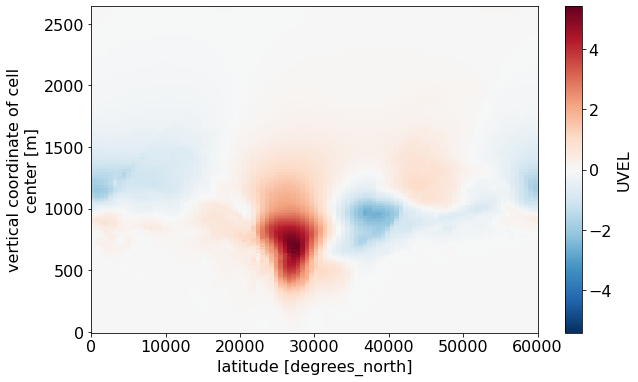

In [57]:
flow["UVEL"].sum("XG").plot()

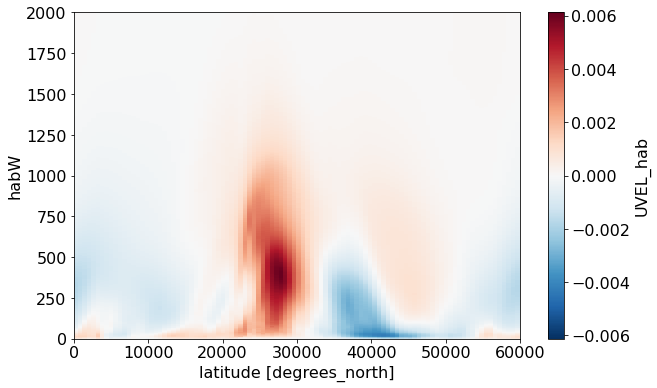

In [54]:
flow['UVEL_hab'].mean("XG").plot(y='habW')

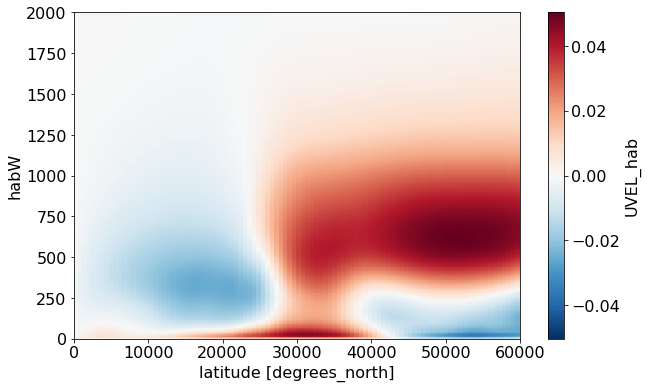

In [55]:
flow['UVEL_hab'].mean("XG").cumsum("YC").plot(y='habW')

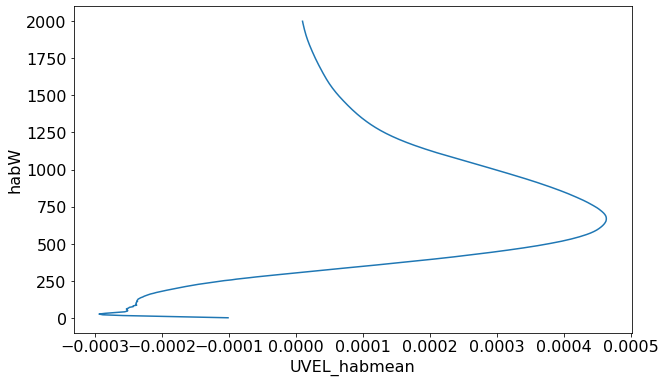

In [52]:
flow["UVEL_habmean"].plot(y='habW')

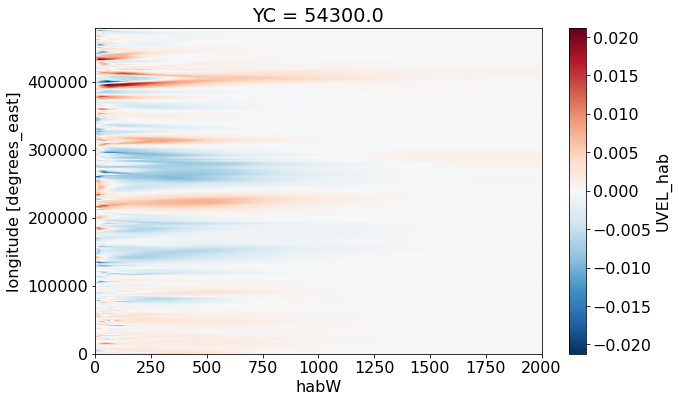

In [43]:
flow['UVEL_hab'].isel(YC=90).plot()

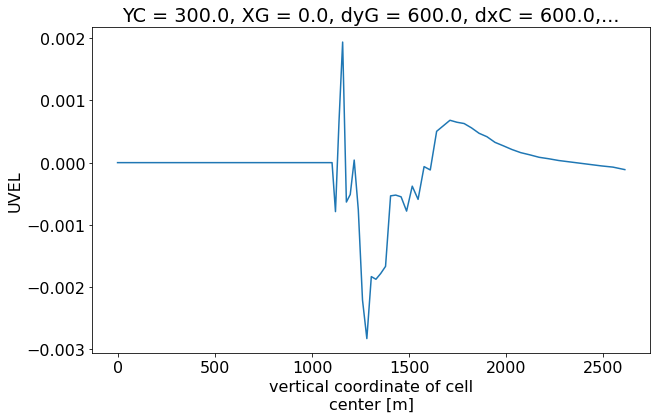

In [32]:
flow['UVEL'].isel(XG=0, YC=0).plot()

In [ ]:
t = 1

for tr in [1, 2, 3]:
    plt.figure()
    plt.subplot(1,3,1)
    ds[f"ωp_Tr0{tr}_hab"].isel(time=t).plot(y="Z_habC_bin")
    plt.grid(True, alpha=0.2)
    plt.xlabel("")
    
    plt.subplot(1,3,2)
    ds[f"θp_Tr0{tr}_hab"].isel(time=t).plot(y="Z_habC_bin")
    plt.grid(True, alpha=0.2)
    plt.xlabel("")
    
    plt.subplot(1,3,3)
    (ds[f"θp_Tr0{tr}_hab"]*ds[f"ωp_Tr0{tr}_hab"]).isel(time=t).plot(y="Z_habC_bin", label=r"$ω$")
    ds[f"ωpθp_bar_Tr0{tr}_hab"].isel(time=t).plot(y="Z_habC_bin")
    plt.grid(True, alpha=0.2)
    plt.xlabel("")

plt.xlim()

t = -1

plt.figure(figsize=(18,12))
for (i, tr) in enumerate([1, 2, 3]):
    plt.subplot(3,4,1+i*4)
    ds[f"ωp_Tr0{tr}_hab"].isel(time=t).plot(y="Z_habC_bin", label=r"$\overline{\omega^{\prime}}^{hab}$")
    plt.grid(True, alpha=0.2)
    plt.xlabel("")
    plt.title("")
    plt.legend(loc="upper left")
    
    plt.subplot(3,4,2+i*4)
    ds[f"θp_Tr0{tr}_hab"].isel(time=t).plot(y="Z_habC_bin", label=r"$\overline{\theta^{\prime}}^{hab}$")
    plt.grid(True, alpha=0.2)
    plt.xlabel("")
    plt.title("")
    plt.legend(loc="upper left")
    
    plt.subplot(3,4,3+i*4)
    (ds[f"M_Tr0{tr}_hab"]/ds["dZ_habC_bin"]).isel(time=t).plot(y="Z_habC_bin", label=r"$\int_{hab} C dA$")
    plt.grid(True, alpha=0.2)
    plt.xlabel("")
    plt.title("")
    plt.legend(loc="upper left")
    
    
    plt.subplot(3,4,4+i*4)
    ((ds[f"θp_Tr0{tr}_hab"]*ds[f"ωp_Tr0{tr}_hab"])*ds[f"M_Tr0{tr}_hab"]/ds["dZ_habC_bin"]).isel(time=t).plot(y="Z_habC_bin", label=r"$\overline{\omega^{\prime}}^{hab} \overline{\theta^{\prime}}^{hab}\, \int_{hab} C dA$")
    (ds[f"ωpθp_bar_Tr0{tr}_hab"]*ds[f"M_Tr0{tr}_hab"]/ds["dZ_habC_bin"]).isel(time=t).plot(y="Z_habC_bin", label=r"$\overline{\omega^{\prime} \theta^{\prime}}^{hab}\, \int_{hab} C dA$")
    plt.grid(True, alpha=0.2)
    plt.xlabel("")
    plt.xlim([-1e-3,1e-3])
    plt.legend(loc="upper left")
    plt.title("")

plt.tight_layout()

for tr in [1, 2, 3]:
    plt.figure()
    plt.subplot(1,3,1)
    ds[f'ωbar_Tr0{tr}_hab'].isel(time=-1).plot(y="Z_habC_bin")
    plt.axvline(ds[f'ωbar_Tr0{tr}'].isel(time=-1), ls="--")
    plt.grid(True, alpha=0.3)
    plt.title("")

    plt.subplot(1,3,2)
    ds[f'θbar_Tr0{tr}_hab'].isel(time=-1).plot(y="Z_habC_bin")
    plt.axvline(ds[f'θbar_Tr0{tr}'].isel(time=-1), ls="--")
    plt.grid(True, alpha=0.3)
    plt.title("")

    plt.subplot(1,3,3)
    (ds[f'ωbar_Tr0{tr}_hab']*ds[f'θbar_Tr0{tr}_hab']).isel(time=-1).plot(y="Z_habC_bin")
    (ds[f'ωbar_Tr0{tr}_hab']*ds[f'θbar_Tr0{tr}_hab']-ds[f'ωbar_Tr0{tr}']*ds[f'θbar_Tr0{tr}']).isel(time=-1).plot(y="Z_habC_bin")
    plt.grid(True, alpha=0.3)
    plt.title("")


plt.tight_layout()

for tr in [1, 2, 3]:
    plt.figure()
    plt.subplot(1,3,1)
    (ds[f'ωbar_Tr0{tr}_hab']*ds[f"M_Tr0{tr}_hab"]/ds["dZ_habC_bin"]).isel(time=-1).plot(y="Z_habC_bin")
    #plt.axvline(ds[f'ωbar_Tr0{tr}'].isel(time=-1)*ds[f"M_Tr0{tr}_hab"], ls="--")
    plt.grid(True, alpha=0.3)
    plt.title("")

    plt.subplot(1,3,2)
    (ds[f'θbar_Tr0{tr}_hab']).isel(time=-1).plot(y="Z_habC_bin")
    plt.axvline(ds[f'θbar_Tr0{tr}'].isel(time=-1), ls="--")
    plt.grid(True, alpha=0.3)
    plt.title("")

    plt.subplot(1,3,3)
    (ds[f'ωbar_Tr0{tr}_hab']*ds[f'θbar_Tr0{tr}_hab']*ds[f"M_Tr0{tr}_hab"]/ds["dZ_habC_bin"]).isel(time=-1).plot(y="Z_habC_bin")
    ((ds[f'ωbar_Tr0{tr}_hab']*ds[f'θbar_Tr0{tr}_hab']-ds[f'ωbar_Tr0{tr}']*ds[f'θbar_Tr0{tr}'])*ds[f"M_Tr0{tr}_hab"]/ds["dZ_habC_bin"]).isel(time=-1).plot(y="Z_habC_bin")
    plt.grid(True, alpha=0.3)
    plt.title("")


    plt.tight_layout()

((ds[f'ωbar_Tr0{tr}_hab']*ds[f'θbar_Tr0{tr}_hab']-ds[f'ωbar_Tr0{tr}']*ds[f'θbar_Tr0{tr}'])*ds[f"M_Tr0{tr}_hab"]).isel(time=-1).cumsum("Z_habC_bin").plot()
plt.grid(True)